# Lab 06 - Bài Tập

### Bài 1: Tạo quần thể mô phỏng

Bạn hãy tạo một mẫu gồm 10000 phần tử mô phỏng chiều cao của nam thanh niên có giá trị từ 120cm - 200cm. Bạn hãy lưu kết quả vào biến **POP**.

Tính:
a. Chiều cao trung bình (kỳ vọng) của quần thể và độ lệch chuẩn về chiều cao của quần thể.

b. Tính tỷ lệ người cao trong quần thể, biết rằng thanh niên có chiều cao từ 180 trở lên được gọi là cao.

c. Vẽ histogram về chiều cao của quần thể. Theo bạn quần thể có phân phối chuẩn hay không?

d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Tạo quần thể mô phỏng POP với 10000 phần tử
np.random.seed(42)  # Để kết quả có thể tái lập
POP = np.random.uniform(120, 200, 10000)

# a. Tính chiều cao trung bình và độ lệch chuẩn
mean_height = np.mean(POP)
std_height = np.std(POP)
print(f"a. Chiều cao trung bình: {mean_height:.2f} cm")
print(f"   Độ lệch chuẩn: {std_height:.2f} cm")



a. Chiều cao trung bình: 159.53 cm
   Độ lệch chuẩn: 23.01 cm


In [2]:
# b. Tính tỷ lệ người cao (>= 180cm)
tall_ratio = np.sum(POP >= 180) / len(POP) * 100
print(f"b. Tỷ lệ người cao (>=180cm): {tall_ratio:.2f}%")

b. Tỷ lệ người cao (>=180cm): 24.13%


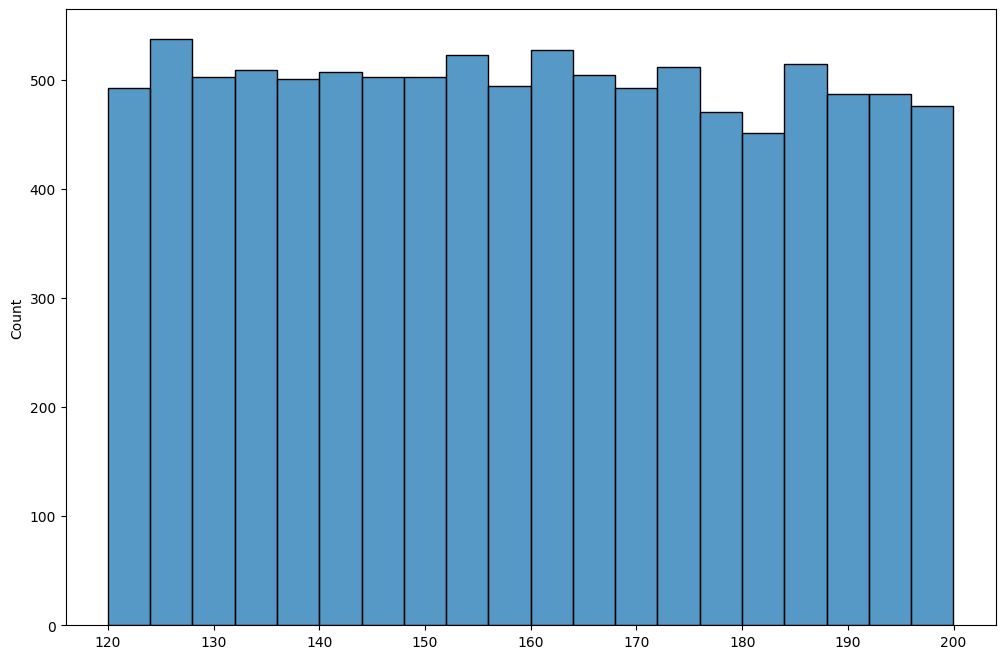

In [3]:
# c. Vẽ histogram
plt.figure(figsize=(12, 8))
sns.histplot(POP, bins=20)
plt.show()

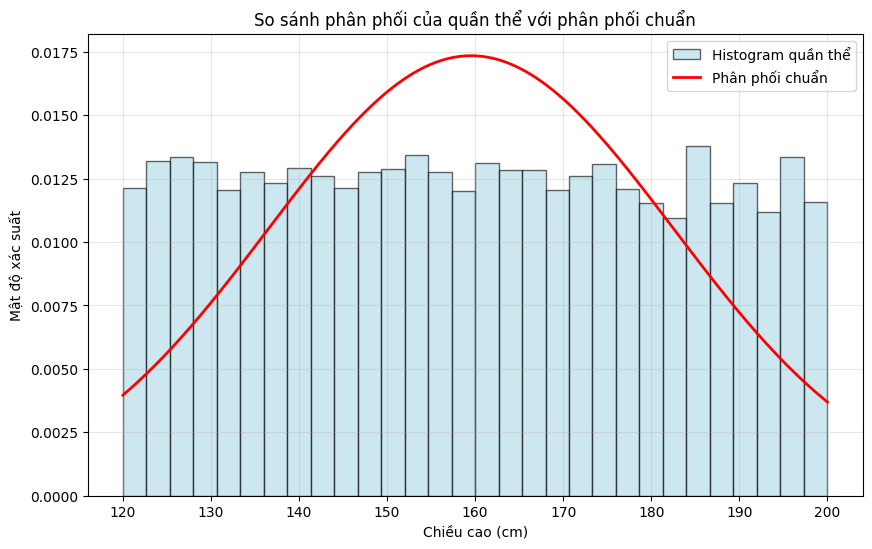

In [26]:
# d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể
plt.figure(figsize=(10, 6))

# Vẽ histogram của dữ liệu gốc
plt.hist(POP, bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Histogram quần thể')

# Tạo mảng x với các giá trị từ 120 đến 200
x = np.linspace(120, 200, 1000)

# Tính giá trị PDF của phân phối chuẩn tại các điểm x
norm_plt = stats.norm.pdf(x, loc=mean_height, scale=std_height)

# Vẽ đường cong phân phối chuẩn
plt.plot(x, norm_plt, 'r-', linewidth=2, label='Phân phối chuẩn')

plt.title('So sánh phân phối của quần thể với phân phối chuẩn')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Bài 2: Lấy mẫu cỡ 20

Bạn hãy lấy một mẫu kích thước 20 phần từ. Tính:

a. Trung bình mẫu, và độ lệch chuẩn của mẫu

b. Tỷ lệ người cao của mẫu

c. Vẽ histogram của mẫu

d. Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với tham số loc và scale bằng với giá trị trung bình và độ lệch chuẩn và chiều cao của mẫu. Bạn có nhận xét gì không?

In [5]:
sample = np.random.choice(POP, size=20, replace=False)
# a. Trung bình mẫu, và độ lệch chuẩn của mẫu
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print(f"a. Trung bình mẫu: {sample_mean:.2f} cm")
print(f"   Độ lệch chuẩn mẫu: {sample_std:.2f} cm")

a. Trung bình mẫu: 169.27 cm
   Độ lệch chuẩn mẫu: 22.87 cm


In [6]:
# b. Tỷ lệ người cao của mẫu
tall_ratio_sample = np.sum(sample >= 180) / len(sample) * 100
print(f"b. Tỷ lệ người cao trong mẫu (>=180cm): {tall_ratio_sample:.2f}%")

b. Tỷ lệ người cao trong mẫu (>=180cm): 45.00%


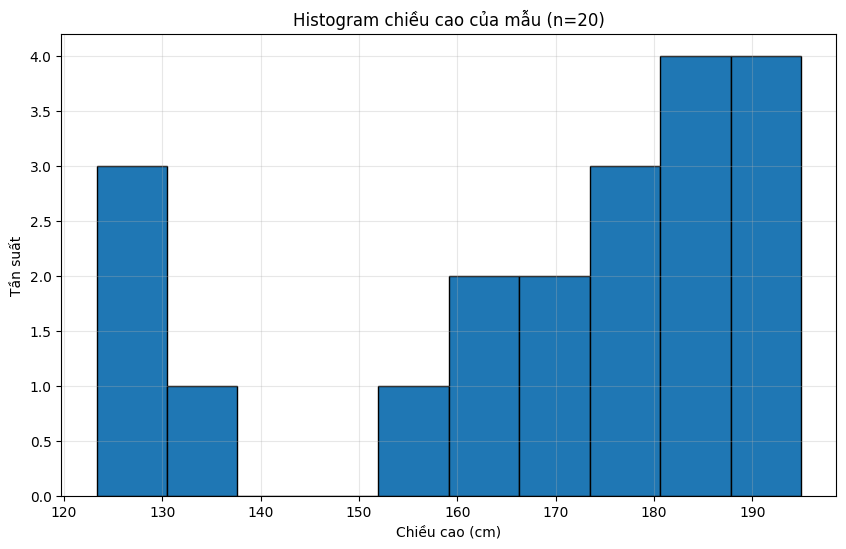

In [7]:
# c. Vẽ histogram của mẫu
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10, edgecolor='black')
plt.title('Histogram chiều cao của mẫu (n=20)')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

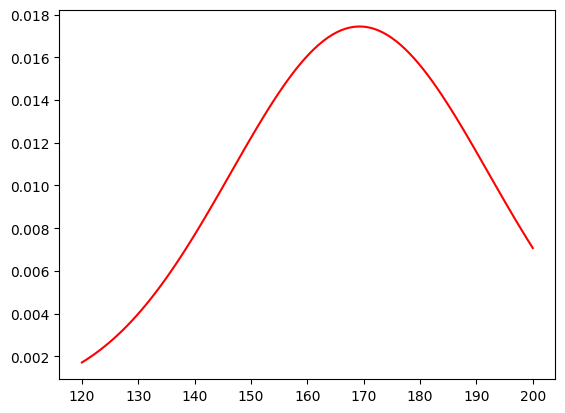

In [8]:
# d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.
x_sample = np.linspace(120, 200, 100)
norm_plts = stats.norm.pdf(x, loc = sample_mean, scale = sample_std)
plt.plot(x, norm_plts, 'r-', label='Phân phối chuẩn')
plt.show()

In [9]:
print("d. Nhận xét: Với mẫu cỡ nhỏ (n=20), histogram không hoàn toàn giống phân phối chuẩn. "
      "Hình dạng của histogram khá ngẫu nhiên và phụ thuộc vào các giá trị được lấy mẫu. "
      "Đường cong phân phối chuẩn (dựa trên trung bình và độ lệch chuẩn của mẫu) chỉ là một xấp xỉ, "
      "nhưng do kích thước mẫu nhỏ và quần thể gốc có phân phối đều, sự phù hợp với phân phối chuẩn là không cao.")

d. Nhận xét: Với mẫu cỡ nhỏ (n=20), histogram không hoàn toàn giống phân phối chuẩn. Hình dạng của histogram khá ngẫu nhiên và phụ thuộc vào các giá trị được lấy mẫu. Đường cong phân phối chuẩn (dựa trên trung bình và độ lệch chuẩn của mẫu) chỉ là một xấp xỉ, nhưng do kích thước mẫu nhỏ và quần thể gốc có phân phối đều, sự phù hợp với phân phối chuẩn là không cao.


### Bài 3: Lấy mẫu cỡ 100

Lặp lại thí nghiệm bài 2 với cỡ mẫu là 100

In [10]:
sample = np.random.choice(POP, size=100, replace=False)
# a. Trung bình mẫu, và độ lệch chuẩn của mẫu
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print(f"a. Trung bình mẫu: {sample_mean:.2f} cm")
print(f"   Độ lệch chuẩn mẫu: {sample_std:.2f} cm")

a. Trung bình mẫu: 159.73 cm
   Độ lệch chuẩn mẫu: 21.76 cm


In [11]:
# b. Tỷ lệ người cao của mẫu
tall_ratio_sample = np.sum(sample >= 180) / len(sample) * 100
print(f"b. Tỷ lệ người cao trong mẫu (>=180cm): {tall_ratio_sample:.2f}%")

b. Tỷ lệ người cao trong mẫu (>=180cm): 22.00%


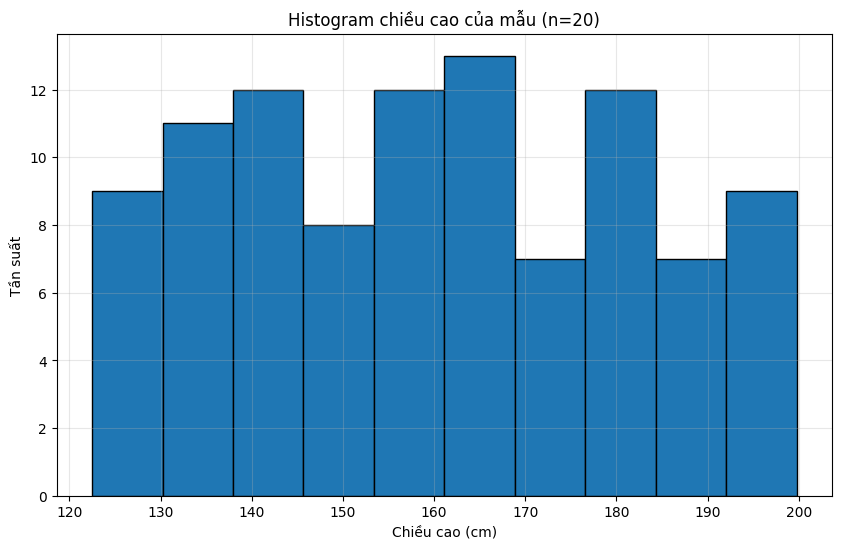

In [12]:
# c. Vẽ histogram của mẫu
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10, edgecolor='black')
plt.title('Histogram chiều cao của mẫu (n=20)')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

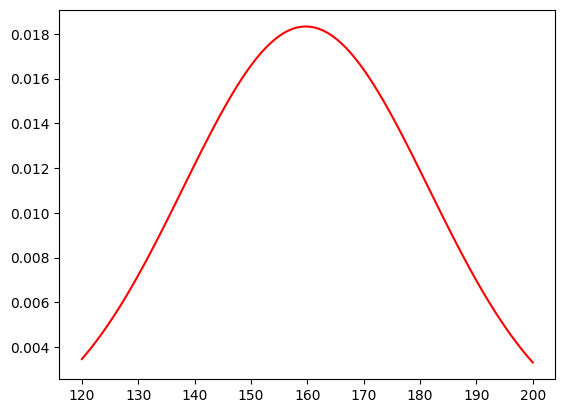

In [13]:
# d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.
x_sample2 = np.linspace(120, 200, 100)
norm_plts2 = stats.norm.pdf(x, loc = sample_mean, scale = sample_std)
plt.plot(x, norm_plts2, 'r-', label='Phân phối chuẩn')
plt.show()

### Bài 4: Khảo sát phân phối của trung bình mẫu

a. Thực hiện bài 2 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

b. Thực hiện bài 3 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

c. Vẽ histogram của hai câu a, b trong cùng một hình để so sánh. Theo bạn hình dạng của histogram thay đổi nói lên điều gì?

Gợi ý: tạo một danh sách rỗng để chứa các trung bình mẫu tính được, sử dụng hàm append() để thêm giá trị trung bình vào danh sách sau mỗi lần tính.

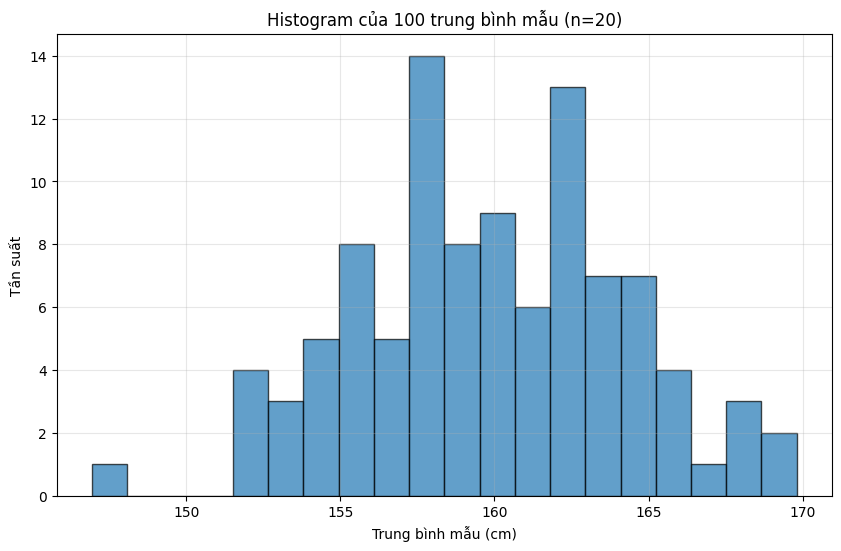

In [14]:
# a. Thực hiện bài 2 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.
sample_means_20 = []
for _ in range(100):
    sample = np.random.choice(POP, size=20, replace=False)
    sample_means_20.append(np.mean(sample))

plt.figure(figsize=(10, 6))
plt.hist(sample_means_20, bins=20, edgecolor='black', alpha=0.7, label='n=20')
plt.title('Histogram của 100 trung bình mẫu (n=20)')
plt.xlabel('Trung bình mẫu (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

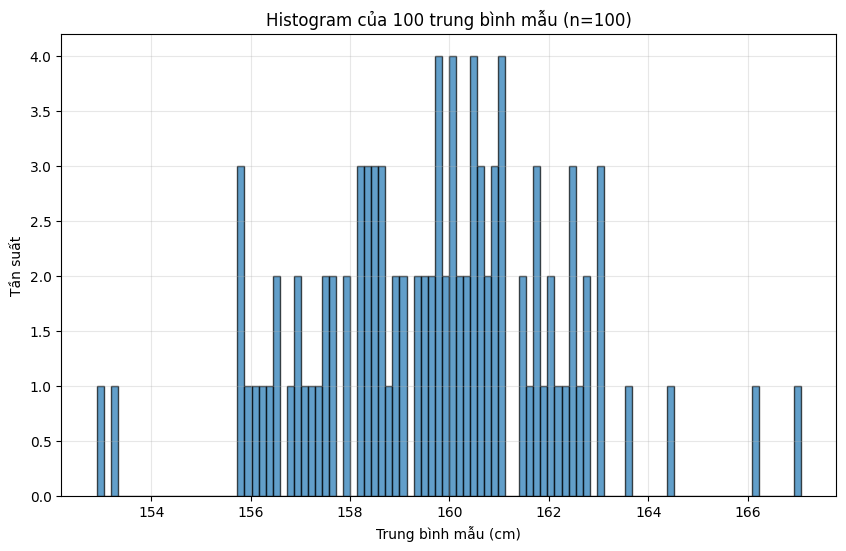

In [15]:
# b. Thực hiện bài 3 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.
sample_means_100 = []
for _ in range(100):
    sample = np.random.choice(POP, size=100, replace=False)
    sample_means_100.append(np.mean(sample))

plt.figure(figsize=(10, 6))
plt.hist(sample_means_100, bins=100, edgecolor='black', alpha=0.7, label='n=20')
plt.title('Histogram của 100 trung bình mẫu (n=100)')
plt.xlabel('Trung bình mẫu (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

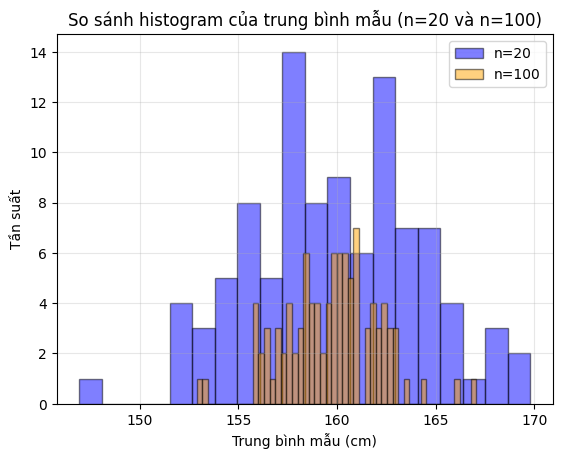

In [16]:
# plt.figure(figsize=(12, 6))
plt.hist(sample_means_20, bins=20, edgecolor='black', alpha=0.5, label='n=20', color='blue')
plt.hist(sample_means_100, bins=50, edgecolor='black', alpha=0.5, label='n=100', color='orange')
plt.title('So sánh histogram của trung bình mẫu (n=20 và n=100)')
plt.xlabel('Trung bình mẫu (cm)')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Bài 5: Khảo sát tỷ lệ mẫu

a. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram tỷ lệ người cao của các mẫu

b. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 500. Vẽ histogram tỷ lệ người cao của các mẫu

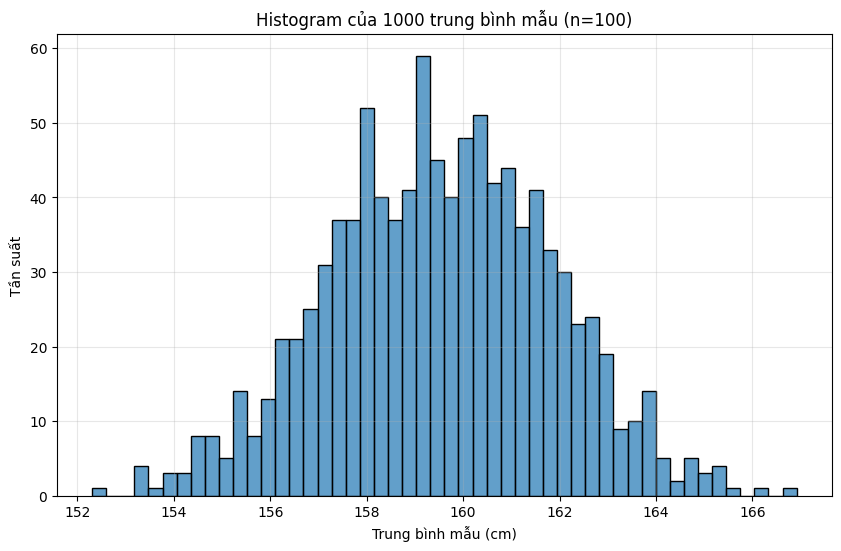

In [17]:
# a. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram tỷ lệ người cao của các mẫu

sample_means_1000a = []
for _ in range(1000):
    sample = np.random.choice(POP, size=100, replace=False)
    sample_means_1000a.append(np.mean(sample)) 
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_1000a, bins=50, edgecolor='black', alpha=0.7, label='n=20')
plt.title('Histogram của 1000 trung bình mẫu (n=100)')
plt.xlabel('Trung bình mẫu (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

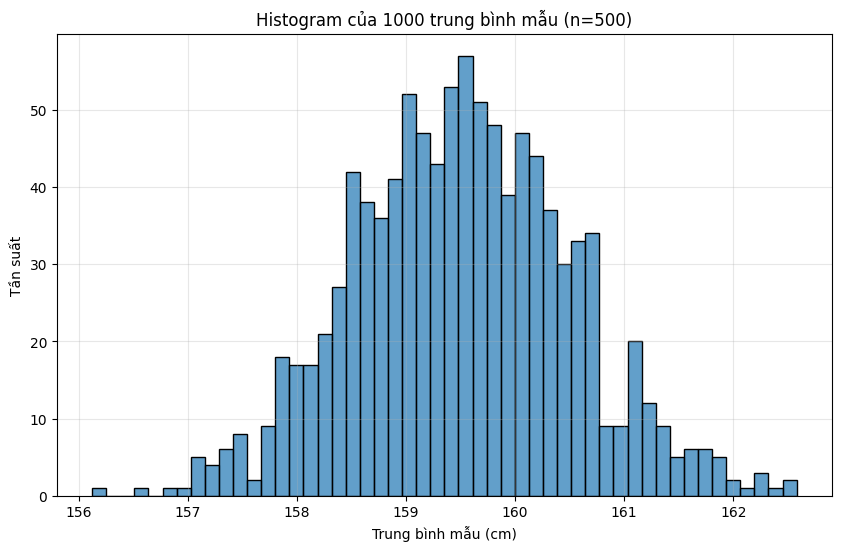

In [18]:
# b. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 500. Vẽ histogram tỷ lệ người cao của các mẫu

sample_means_1000b = []
for _ in range(1000):
    sample = np.random.choice(POP, size=500, replace=False)
    sample_means_1000b.append(np.mean(sample)) 
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_1000b, bins=50, edgecolor='black', alpha=0.7, label='n=20')
plt.title('Histogram của 1000 trung bình mẫu (n=500)')
plt.xlabel('Trung bình mẫu (cm)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)
plt.show()

### Bài 6: Khảo sát phương sai mẫu

Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram đại lượng phương sai của các mẫu (Phương sai bằng bình phương độ lệch chuẩn)

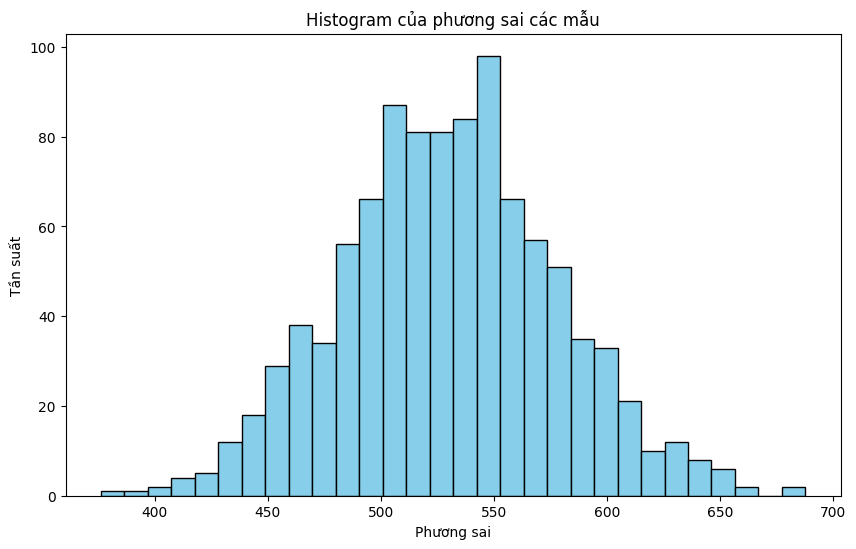

In [19]:
sample_variances = []

for _ in range(1000):
    sample = np.random.choice(POP, size=100, replace=False)
    sample_std = np.std(sample, ddof=1) 
    sample_variance = sample_std**2
    sample_variances.append(sample_variance)

plt.figure(figsize=(10, 6))
plt.hist(sample_variances, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram của phương sai các mẫu')
plt.xlabel('Phương sai')
plt.ylabel('Tần suất')
plt.show()

### Bài 7:  Bài Tập Ước Lượng 

Khảo sát cân nặng (kg) của gà khi xuất chuồng, người ta cân một số con và có kết quả như sau:

> 2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8

Giả sử cân nặng của gà là biến ngẫu nhiên có phân phối chuẩn. Hãy lập khoảng tin cậy cho cân nặng trung bình của  khi xuất chuồng với độ tin cậy là 95%. Trong 2 trường hợp:

a, Biết $\sigma = 0.3$

b, Không biết $\sigma$


In [28]:
# Dữ liệu cân nặng của gà (kg)
weights = np.array([2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8])

# Tính các giá trị thống kê cơ bản
n = len(weights)
sample_mean = np.mean(weights)
sample_std = np.std(weights, ddof=1)  # ddof=1 để tính s là ước lượng không chệch của sigma

print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu: {sample_mean:.4f} kg")
print(f"Độ lệch chuẩn mẫu: {sample_std:.4f} kg")

# Trường hợp a: Biết σ = 0.3
sigma = 0.3
alpha = 0.05  # Độ tin cậy 1-alpha = 95%
z_value = stats.norm.ppf(1 - alpha/2)  # Giá trị z cho khoảng tin cậy 95%

# Tính margin of error
margin_of_error = z_value * (sigma / np.sqrt(n))

# Tính khoảng tin cậy
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"\nTrường hợp a (biết σ = {sigma}):")
print(f"Giá trị z (mức ý nghĩa {100*(1-alpha)}%): {z_value:.4f}")
print(f"Margin of error: {margin_of_error:.4f}")
print(f"Khoảng tin cậy 95%: [{ci_lower:.4f}, {ci_upper:.4f}]")

Số mẫu (n): 9
Trung bình mẫu: 1.9333 kg
Độ lệch chuẩn mẫu: 0.2550 kg

Trường hợp a (biết σ = 0.3):
Giá trị z (mức ý nghĩa 95.0%): 1.9600
Margin of error: 0.1960
Khoảng tin cậy 95%: [1.7373, 2.1293]


In [29]:
# b, Không biết sigma

# t-value cho độ tin cậy 95% và (n-1) bậc tự do
# Trường hợp b: Không biết σ
t_value = stats.t.ppf(1 - alpha/2, df=n-1)  # Giá trị t với bậc tự do n-1

# Tính margin of error
margin_of_error_t = t_value * (sample_std / np.sqrt(n))

# Tính khoảng tin cậy
ci_lower_t = sample_mean - margin_of_error_t
ci_upper_t = sample_mean + margin_of_error_t

print(f"\nTrường hợp b (không biết σ):")
print(f"Giá trị t (bậc tự do {n-1}, mức ý nghĩa {100*(1-alpha)}%): {t_value:.4f}")
print(f"Margin of error: {margin_of_error_t:.4f}")
print(f"Khoảng tin cậy 95%: [{ci_lower_t:.4f}, {ci_upper_t:.4f}]")



Trường hợp b (không biết σ):
Giá trị t (bậc tự do 8, mức ý nghĩa 95.0%): 2.3060
Margin of error: 0.1960
Khoảng tin cậy 95%: [1.7374, 2.1293]


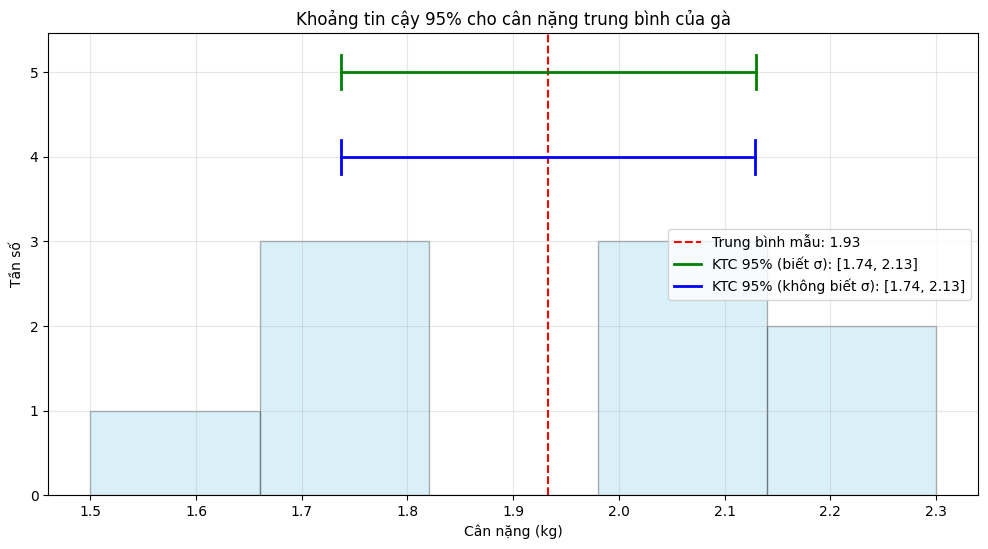

In [30]:
plt.figure(figsize=(12, 6))

# Vẽ histogram của dữ liệu
plt.hist(weights, bins=5, alpha=0.3, color='skyblue', edgecolor='black')

# Vẽ đường trung bình mẫu
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Trung bình mẫu: {sample_mean:.2f}')

# Vẽ khoảng tin cậy khi biết σ
plt.plot([ci_lower, ci_upper], [5, 5], 'g-', linewidth=2, 
         label=f'KTC 95% (biết σ): [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.plot([ci_lower, ci_lower], [4.8, 5.2], 'g-', linewidth=2)
plt.plot([ci_upper, ci_upper], [4.8, 5.2], 'g-', linewidth=2)

# Vẽ khoảng tin cậy khi không biết σ
plt.plot([ci_lower_t, ci_upper_t], [4, 4], 'b-', linewidth=2, 
         label=f'KTC 95% (không biết σ): [{ci_lower_t:.2f}, {ci_upper_t:.2f}]')
plt.plot([ci_lower_t, ci_lower_t], [3.8, 4.2], 'b-', linewidth=2)
plt.plot([ci_upper_t, ci_upper_t], [3.8, 4.2], 'b-', linewidth=2)

plt.xlabel('Cân nặng (kg)')
plt.ylabel('Tần số')
plt.title('Khoảng tin cậy 95% cho cân nặng trung bình của gà')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Bài 8

Bộ dữ liệu `SAT-lard.csv` chứa điểm thi SAT của 1000 học sinh. 

a. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy 99% (`Đáp án: 105.2 ± 3.10`)

b. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy (`Đáp án: 105.2 ± 1.86`)

c. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Tính điểm SAT trung bình của trường phổ thông đấy. (`Đáp án:  μ = 1528.74`)

d. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **99%** cho điểm SAT trung bình của trường phổ thông đấy. (`Đáp án: (1428.22, 1602.89)`)

e. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **95%** cho điểm SAT trung bình của trường phổ thông đấy. Cho biết khoảng ước lượng bạn xây dựng có đúng không, dựa trên giá trị đã tính ở câu trên.

In [32]:
import pandas as pd
df = pd.read_csv('data/SAT-lard.csv')
df

,SAT Score,College GPA
0,1300,3.66
1,1520,2.92
2,1580,2.66
3,1430,2.27
4,1610,2.35
...,...,...
995,1480,1.47
996,1760,3.24
997,1780,2.96
998,1450,1.72


In [44]:
n = 1000
mean_score = np.mean(df['SAT Score'])
std_score = np.std(df['SAT Score'])

t = stats.t.ppf(1-(0.01 / 2), df=n-1)

before = mean_score - t * (std_score / np.sqrt(n))
after = mean_score + t * (std_score / np.sqrt(n))

print(f"Khoảng tin cậy 99%: ({before:.2f}, {after:.2f})")

Khoảng tin cậy 99%: (1511.40, 1546.08)


In [38]:
n = len(df) 
mean_score = np.mean(df['SAT Score']) 
std_score = np.std(df['SAT Score'], ddof=1) 

t_value_99 = stats.t.ppf(0.995, df=n-1)

ci_lower_99 = mean_score - t_value_99 * (std_score / np.sqrt(n))
ci_upper_99 = mean_score + t_value_99 * (std_score / np.sqrt(n))

print(f"Khoảng tin cậy 99%: ({ci_lower_99:.2f}, {ci_upper_99:.2f})")

Khoảng tin cậy 99%: (1511.39, 1546.09)


In [ ]:
# b. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy (`Đáp án: 105.2 ± 1.86`)
t_value_95 = stats.t.ppf(0.975, df=n-1)

ci_lower_95 = mean_score - t_value_95 * (std_score / np.sqrt(n))
ci_upper_95 = mean_score + t_value_95 * (std_score / np.sqrt(n))

print(f"Khoảng tin cậy 95%: ({ci_lower_95:.2f}, {ci_upper_95:.2f})")


Khoảng tin cậy 95%: (1515.55, 1541.93)


In [ ]:
# c.
total_mean = np.mean(df['SAT Score'])
print(f"Điểm SAT trung bình của trường phổ thông: {total_mean:.2f}")


Điểm SAT trung bình của trường phổ thông: 1528.74


---

In [ ]:
# d. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **99%** cho điểm SAT trung bình của trường phổ thông đấy. (`Đáp án: (1428.22, 1602.89)`)
sample_36 = df['SAT Score'][:36]

n_sample = len(sample_36)
mean_sample_36 = np.mean(sample_36)
std_sample_36 = np.std(sample_36, ddof=1)

t_value_sample_36_99 = stats.t.ppf(0.995, df=n_sample-1)

ci_lower_sample_36_99 = mean_sample_36 - t_value_sample_36_99 * (std_sample_36 / np.sqrt(n_sample))
ci_upper_sample_36_99 = mean_sample_36 + t_value_sample_36_99 * (std_sample_36 / np.sqrt(n_sample))

print(f"Khoảng tin cậy 99% cho mẫu 36 học sinh: ({ci_lower_sample_36_99:.2f}, {ci_upper_sample_36_99:.2f})")


Khoảng tin cậy 99% cho mẫu 36 học sinh: (1423.17, 1607.94)


In [ ]:
# e. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **95%** cho điểm SAT trung bình của trường phổ thông đấy. Cho biết khoảng ước lượng bạn xây dựng có đúng không, dựa trên giá trị đã tính ở câu trên.
t_value_sample_36_95 = stats.t.ppf(0.975, df=n_sample-1)

ci_lower_sample_36_95 = mean_sample_36 - t_value_sample_36_95 * (std_sample_36 / np.sqrt(n_sample))
ci_upper_sample_36_95 = mean_sample_36 + t_value_sample_36_95 * (std_sample_36 / np.sqrt(n_sample))

print(f"Khoảng tin cậy 95% cho mẫu 36 học sinh: ({ci_lower_sample_36_95:.2f}, {ci_upper_sample_36_95:.2f})")


Khoảng tin cậy 95% cho mẫu 36 học sinh: (1446.70, 1584.41)
